The `results-summary.txt` contains, for each alternative model, the name and the overal badness from PyTEK

In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
import yaml
import brewer2mpl
import imageio
import pandas as pd

model_list = [f.split(".cti")[0] for f in os.listdir("/Users/nathan/Code/OOHabstraction/comparisonTST/reference_files/cantera_sub_models/sarathy/") if f.endswith(".cti")]

models = []

for model in model_list:
    results_file = os.path.join("/Users/nathan/Code/OOHabstraction/comparisonTST/test_performance/pyteck_results", model + "-results.yaml")

    if os.path.exists(results_file):
        with open(results_file, 'r') as f:
            results = yaml.load(f)

        models.append([results['model'], results['average error function'], results['average deviation function'], results['error function standard deviation']])


In [3]:
data = pd.DataFrame(models, columns=["model","error", "average deviation function", "error function standard deviation" ])
data

,model,error,average deviation function,error function standard deviation
0,master.0.0.cti,18.976938,2.604103,20.563292
1,master.1081.1.cti,18.976653,2.604035,20.563037
2,master.1148.1.cti,18.976755,2.604152,20.562803
3,master.1150.1.cti,18.977106,2.604114,20.562985
4,master.1187.1.cti,21.999477,2.971725,23.275360
5,master.1194.1.cti,19.043000,2.612679,20.627439
6,master.1195.1.cti,19.034962,2.611526,20.613214
7,master.1196.1.cti,19.173118,2.630015,20.750252
8,master.1211.1.cti,18.977671,2.604095,20.563745
9,master.1233.1.cti,18.977013,2.604135,20.562425


In [4]:
sns.set_style('ticks')

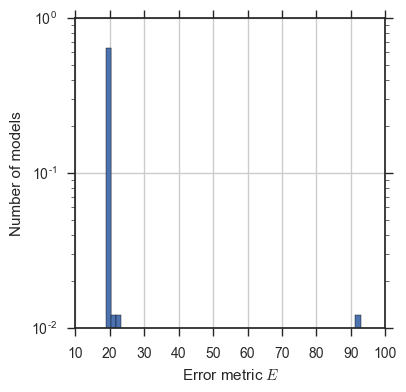

In [5]:

data.error.hist(bins=50, log=True, figsize=(4,4), normed=True)
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")

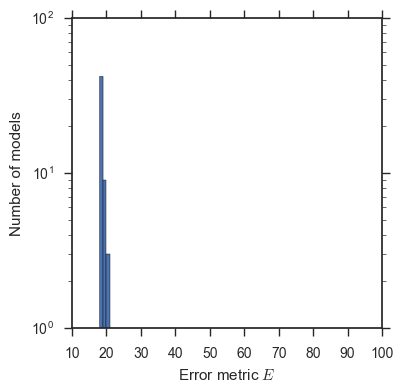

In [6]:
e = data['error']
plt.figure(figsize=(4,4))
plt.hist(e, bins=range(int(min(e)),int(max(e))+1), log=True, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")

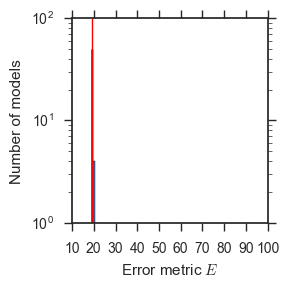

In [7]:
e = data['error']
plt.figure(figsize=(3,3))
plt.hist(e, bins=100, log=True, normed=False) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.vlines(e[0],0,100, color='red', linewidth=1)
min(e), max(e)
plt.tight_layout()
plt.savefig('histogram-log.pdf')

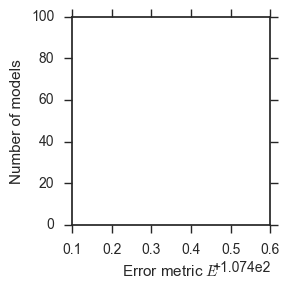

In [8]:
e = data['error']
plt.figure(figsize=(3,3))
plt.hist(e, bins=50, log=False, normed=False) 
plt.xlim(107.5,108)
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.vlines(e[0],0,100, color='red', linewidth=1)
plt.tight_layout()
plt.savefig('histogram-linear.pdf')

In [9]:
data['deltaE'] = data['error'] - e[0]
data

,model,error,average deviation function,error function standard deviation,deltaE
0,master.0.0.cti,18.976938,2.604103,20.563292,0.000000
1,master.1081.1.cti,18.976653,2.604035,20.563037,-0.000285
2,master.1148.1.cti,18.976755,2.604152,20.562803,-0.000183
3,master.1150.1.cti,18.977106,2.604114,20.562985,0.000168
4,master.1187.1.cti,21.999477,2.971725,23.275360,3.022540
5,master.1194.1.cti,19.043000,2.612679,20.627439,0.066062
6,master.1195.1.cti,19.034962,2.611526,20.613214,0.058024
7,master.1196.1.cti,19.173118,2.630015,20.750252,0.196180
8,master.1211.1.cti,18.977671,2.604095,20.563745,0.000733
9,master.1233.1.cti,18.977013,2.604135,20.562425,0.000075


In [10]:
data['absDeltaE'] = data['deltaE'].map(abs)
sorted_abs  = data.sort_values(by='absDeltaE', ascending=False)
sorted_abs

,model,error,average deviation function,error function standard deviation,deltaE,absDeltaE
20,master.1567.1.cti,92.816657,7.402764,86.283234,73.839719,73.839719
4,master.1187.1.cti,21.999477,2.971725,23.275360,3.022540,3.022540
18,master.1565.1.cti,20.574000,2.814879,22.146638,1.597062,1.597062
17,master.1564.1.cti,20.198815,2.770306,21.923705,1.221877,1.221877
19,master.1566.1.cti,20.151182,2.759673,21.859003,1.174244,1.174244
52,master.77.1.cti,19.979097,2.837426,21.401376,1.002159,1.002159
40,master.252.1.cti,19.705949,2.708233,21.178628,0.729011,0.729011
7,master.1196.1.cti,19.173118,2.630015,20.750252,0.196180,0.196180
21,master.1568.1.cti,19.168893,2.629947,20.740278,0.191955,0.191955
44,master.410.1.cti,19.138953,2.637636,20.717651,0.162015,0.162015


/Users/nathan/anaconda/envs/rmg_env/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


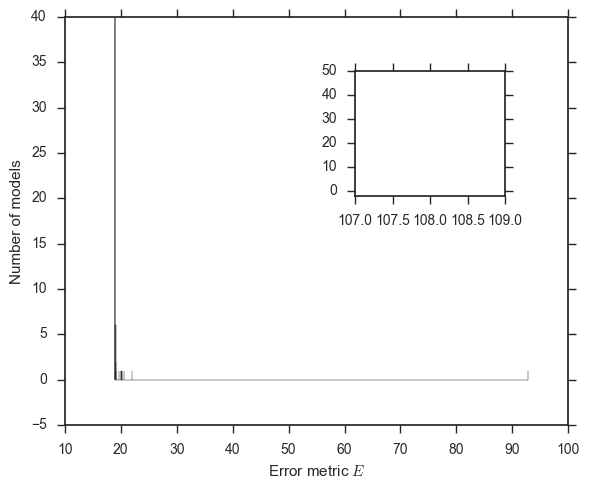

In [11]:
e = data['error']
plt.figure(figsize=(6,5))
# range(int(min(e)),int(max(e))+1)
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.ylim(-5,)

# this is an inset axes over the main axes
a = plt.axes([.6, .6, .25, .25])
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.vlines(e[0],0,50, color='red', linewidth=1)
plt.ylim(-2,50)
plt.xlim(107,109)
#plt.xticks([])
#plt.yticks([])


plt.tight_layout()
plt.savefig("big-histogram.pdf")
#plt.vlines(e[0],0,25, color='red', linewidth=1)

(10, 100)

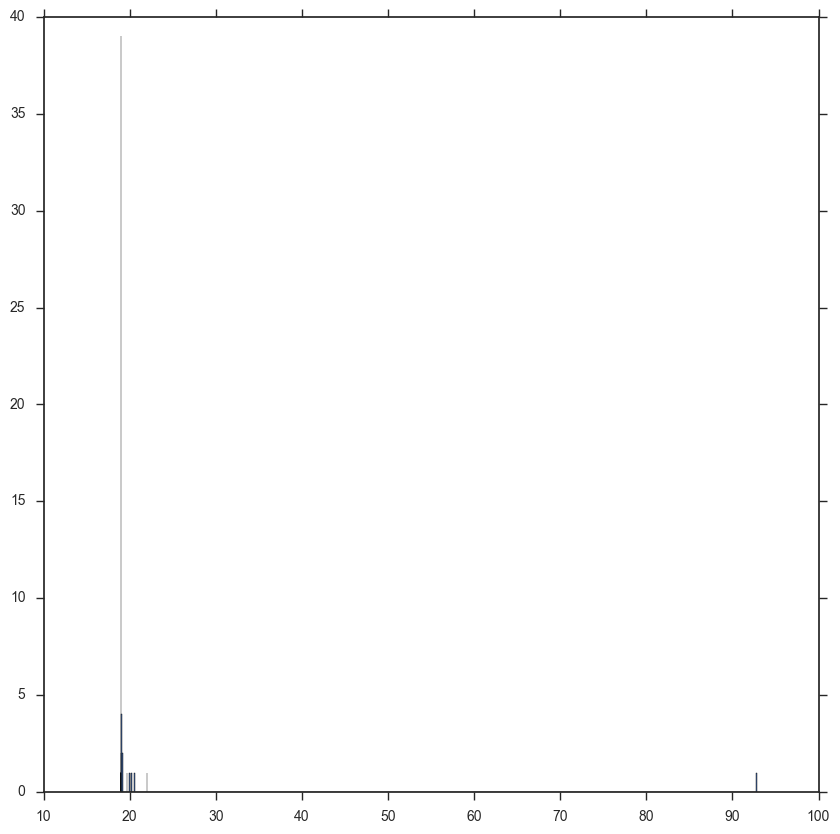

In [12]:
e = data['error']
plt.figure(figsize=(10,10))
# range(int(min(e)),int(max(e))+1)
a = plt.hist(e, bins=2000, log=False, normed=False) 

plt.xlim(10,100)


In [13]:
min(e), max(e)

(18.92000543261366, 92.816656613020456)

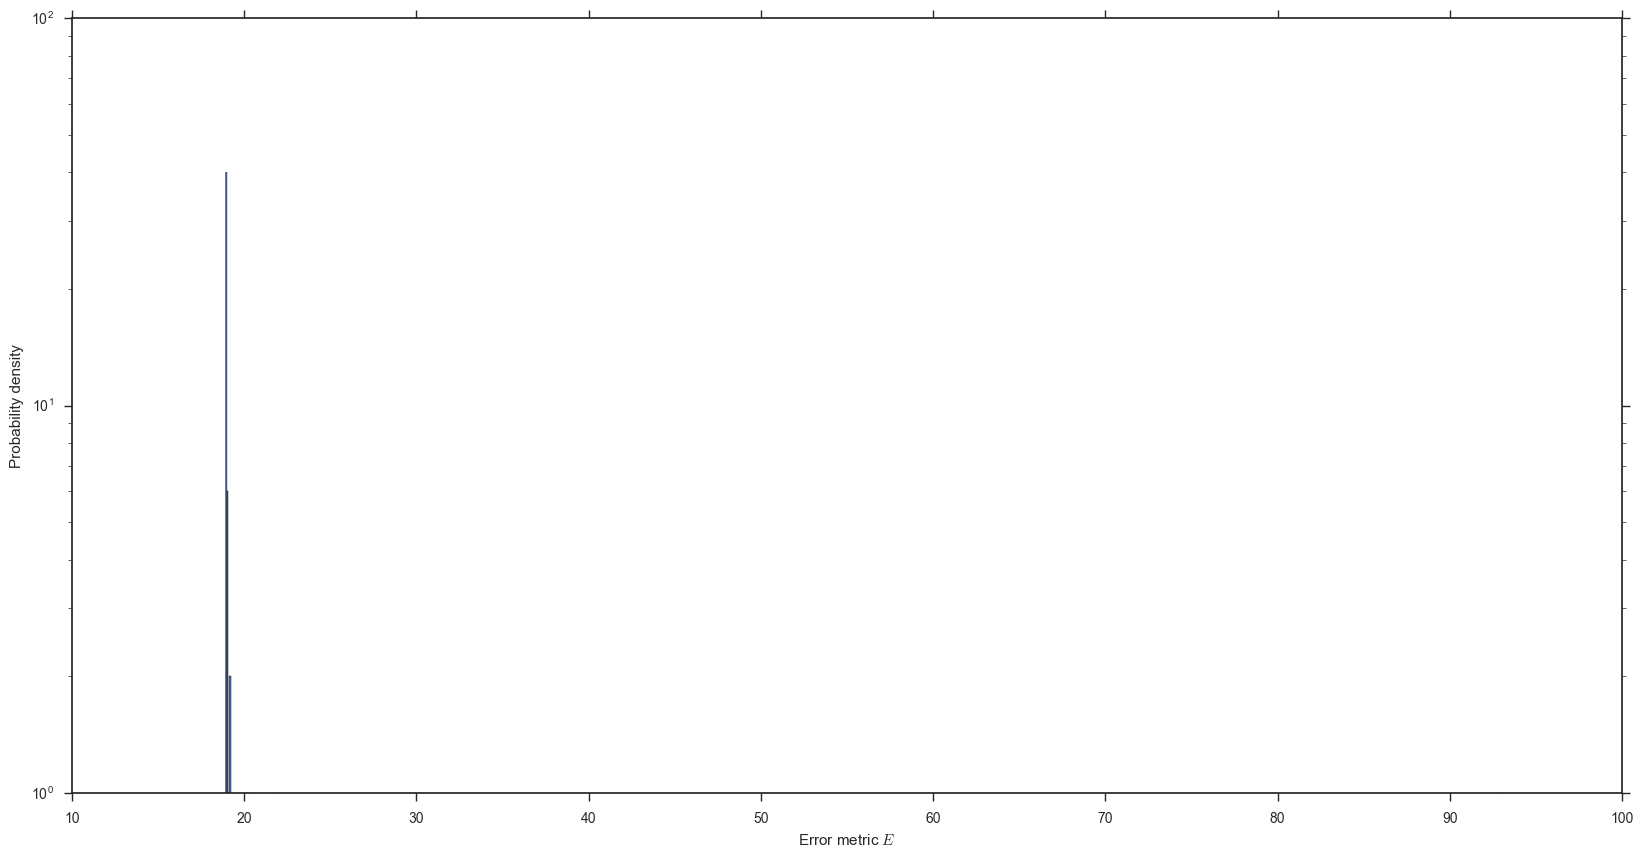

In [14]:
e = data['error']
plt.figure(figsize=(20,10))
# range(int(min(e)),int(max(e))+1)
a = plt.hist(e, bins=bins, log=True, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Probability density")

In [15]:
delta = (e-e[0])
delta[delta!=0].abs().min()

6.2757906604815616e-06

In [16]:
delta[delta==0] = 1e-4


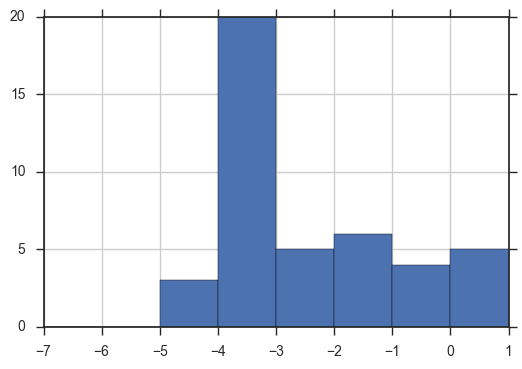

In [17]:
delta[delta>0].map(np.log10).hist(bins=range(-7,2))

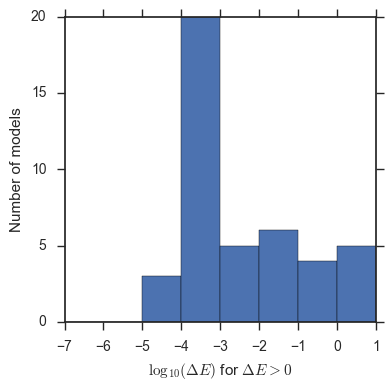

In [18]:
plt.figure(figsize=(4,4))
plt.hist(delta[delta>0].map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}(\Delta E)$ for $\Delta E > 0$')
plt.ylabel('Number of models')
plt.tight_layout()
plt.savefig("histogram-logx.pdf")

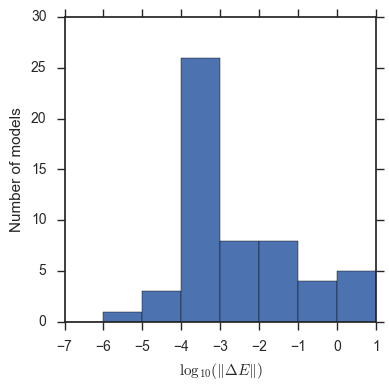

In [19]:
plt.figure(figsize=(4,4))
plt.hist(delta.abs().map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}( \| \Delta E \|)$')
plt.ylabel('Number of models')
plt.tight_layout()
plt.savefig("histogram-logAbsDeltaE.pdf")

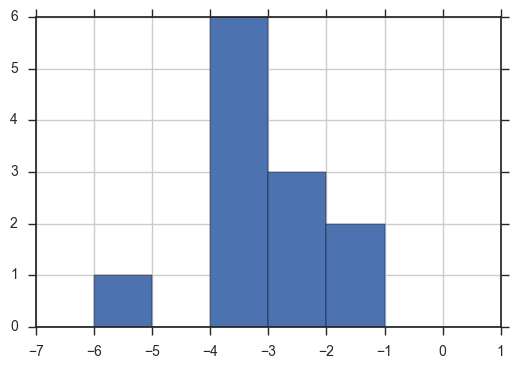

In [20]:
(delta[delta<0]*-1).map(np.log10).hist(bins=range(-7,2))

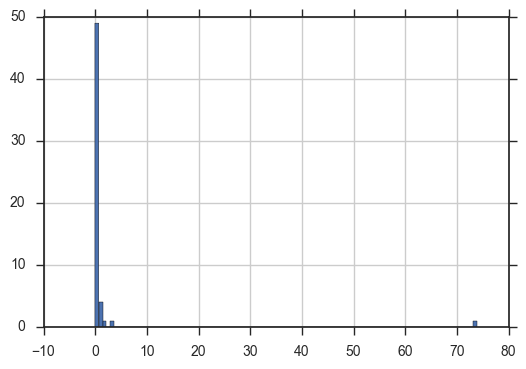

In [21]:
delta.hist(bins=100, log=False)

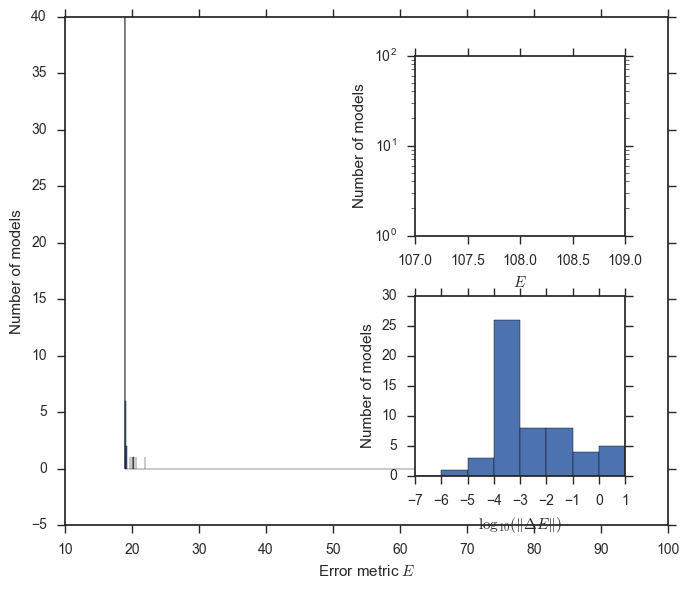

In [22]:
e = data['error']
plt.figure(figsize=(7,6))
# range(int(min(e)),int(max(e))+1)
n, bins, patches = plt.hist(e, bins=1000, log=False, normed=False ) 
plt.xlabel("Error metric $E$")
plt.ylabel("Number of models")
plt.ylim(-5,)

# this is an inset axes over the main axes
a = plt.axes([.6, .6, .3, .3])
plt.hist(e, bins=1000, log=True, normed=False ) 
plt.vlines(e[0],0,50, color='red', linewidth=1)
plt.xlim(107,109)
plt.xlabel('$E$')
plt.ylabel('Number of models')

a = plt.axes([.6, .2, .3, .3])
plt.hist(delta.abs().map(np.log10), bins=range(-7,2))
plt.xlabel('$\log_{10}( \| \Delta E \|)$')
plt.ylabel('Number of models')
#
#plt.ylim(-2,50)
#plt.xlim(107,109)
#plt.xticks([])
#plt.yticks([])

plt.tight_layout()
plt.savefig("big-histogram.pdf")
#plt.vlines(e[0],0,25, color='red', linewidth=1)

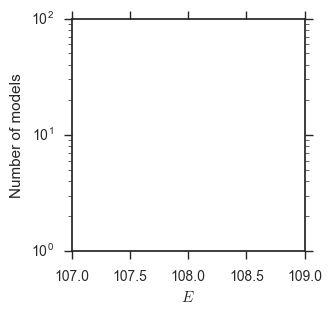

In [23]:
# this is an inset axes over the main axes
plt.figure(figsize=(3,3))
plt.hist(e, bins=1000, log=True, normed=False )
plt.xlim(107,109)
plt.xlabel('$E$')
plt.ylabel('Number of models')

In [24]:
x=0.01
print "percentage of substitutions changing the error by less than",x
100.* sum(delta<x) / (len(delta)-1)

percentage of substitutions changing the error by less than 0.01


72.72727272727273